In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
#import mglearn
import math
from numpy import genfromtxt

In [2]:
class CSV_Data:
   def __init__(self, data, target, feature_names, target_name, file_name):
        self.data = data
        self.target = target
        self.feature_names = feature_names
        self.target_name = target_name
        self.file_name = file_name
        

def loadData(file_path):
    data = []
    target = []
    feature_names = []
    target_name = ''
    file_name = file_path.split('\\')[-1]
    with open(file_path) as data_file:
        all_lines = [s[:-1] for s in data_file.readlines()]
        feature_names = all_lines[0].split(',')[1:]
        target_name = all_lines[0].split(',')[0]
        for line in all_lines[1:]:
            values = line.split(',')
            target.append(values[0])
            data.append([])
            for val in values:
                data[-1].append(val)
    return CSV_Data(np.array(data, ndmin=2), np.array(target), feature_names, target_name, file_name)

wine_data = loadData('Wine-A2\wine.csv')
print(wine_data.data)
print("Shape of wine data:",wine_data.data.shape)
print(wine_data.target)
print("Shape of wine target:", wine_data.target.shape)
print("wine feature names:", wine_data.feature_names)
print(wine_data.target_name)
print(wine_data.file_name)

[['1' '14.23' '1.71' ... '1.04' '3.92' '1065']
 ['1' '13.2' '1.78' ... '1.05' '3.4' '1050']
 ['1' '13.16' '2.36' ... '1.03' '3.17' '1185']
 ...
 ['3' '13.27' '4.28' ... '0.59' '1.56' '835']
 ['3' '13.17' '2.59' ... '0.6' '1.62' '840']
 ['3' '14.13' '4.1' ... '0.61' '1.6' '560']]
Shape of wine data: (178, 14)
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' 

In [7]:
print("Shape of wine data:", wine_data.data.shape)
print("Shape of wine target:", wine_data.target.shape)
print("wine feature names:", wine_data.feature_names)
#print("Shape of wine target names:", wine_data.target_names)
#print("Shape of wine:", wine_data.frame)

Shape of wine data: (178, 14)
Shape of wine target: (178,)
wine feature names: ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanois', 'Nonflavanoid phenols', 'Proanthocyanins', 'Colr intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


In [10]:
print("Number of Features:", len(wine_data.feature_names))


13


In [7]:
#4
from sklearn.datasets import load_wine
wine_data = load_wine()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_data['data'], wine_data['target'], random_state=80)

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (133, 13)
y_train shape: (133,)


In [9]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (45, 13)
y_test shape: (45,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
X_new = np.array([[4, 3, 1, 0.2,5,0.4,8,6,5,5,11,15,0.5]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 13)


In [20]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       wine_data['target_names'][prediction])

Prediction: [1]
Predicted target name: ['class_1']


In [21]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [1 0 0 0 1 2 0 0 2 1 0 0 0 0 2 2 0 0 2 2 1 0 2 2 0 1 0 0 0 1 2 1 1 0 2 2 0
 0 0 1 0 0 0 0 1]


In [22]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.82


In [26]:
# Neighbor of 1
X_train, X_test, y_train, y_test = train_test_split(
    wine_data['data'], wine_data['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.76


In [28]:
# Neighbor of 3
X_train, X_test, y_train, y_test = train_test_split(
    wine_data['data'], wine_data['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.73


In [41]:
# Neighbor of sqrt(n) + 3
X_train, X_test, y_train, y_test = train_test_split(
    wine_data['data'], wine_data['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=math.ceil(math.sqrt(13)+3))
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.78


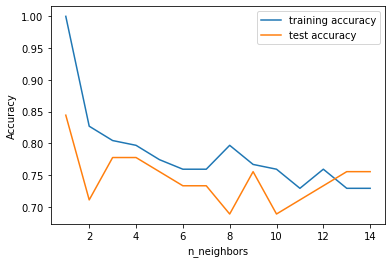

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_data.data, wine_data.target, stratify=wine_data.target, random_state=80)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to sqrt(n)+3
neighbors_settings = range(1, math.ceil(math.sqrt(len(X_train))+3))

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [68]:
#5
class sklearn.model_selection.StratifiedKFold(n_splits=5,*,shuffle=False, random_state=None)


SyntaxError: invalid syntax (<ipython-input-68-5873b355d257>, line 2)